In [1248]:
# Importando bibliotecas
%matplotlib inline 
import numpy as np
import pandas as pd
import os
import matplotlib as plt
from IPython.display import display
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score # importando a biblioteca para calcular a acurácia
import seaborn as sns



In [1249]:

import warnings

warnings.filterwarnings('ignore')

In [1250]:
# Verificando se a base de dados está na pasta
filename = 'Base - MindMiners.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo Base - MindMiners.xlsx está na mesma pasta do notebook!


In [1251]:
df = pd.read_excel('Base - MindMiners.xlsx')


In [1252]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 86 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   P1           991 non-null    float64
 2   P2           995 non-null    object 
 3   P3           994 non-null    float64
 4   P4           994 non-null    float64
 5   Unnamed: 5   111 non-null    float64
 6   P5           994 non-null    object 
 7   P6           992 non-null    object 
 8   P7           993 non-null    object 
 9   P8           992 non-null    float64
 10  P9           992 non-null    object 
 11  Unnamed: 11  111 non-null    float64
 12  P10          991 non-null    float64
 13  P11          991 non-null    float64
 14  P12          992 non-null    object 
 15  P13          992 non-null    float64
 16  Unnamed: 16  111 non-null    float64
 17  P14          992 non-null    float64
 18  P15          991 non-null    float64
 19  Unname

In [1253]:
df.isnull().sum()

Unnamed: 0    1268
P1             277
P2             273
P3             274
P4             274
              ... 
Qid            277
Qgen           277
Qreg           277
Qclasse        277
Qs             302
Length: 86, dtype: int64

In [1254]:
df["P1"].value_counts(dropna=False)
    

1.0    448
2.0    294
NaN    277
4.0    186
3.0     17
6.0     17
5.0     16
7.0     13
Name: P1, dtype: int64

In [1255]:
lista_df = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P25","P26","P27","P28","P29","P30","P31","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58","Qesc","Qciv","Qnat","Qtipcama","Qcama","Qest","Qche","Qocup","Qid","Qgen","Qreg","Qclasse"]



In [1256]:
lista_df[0]

'P1'

In [1257]:
df_dropped = df.loc[:,["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P25","P26","P27","P28","P29","P30","P31","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58","Qesc","Qciv","Qnat","Qtipcama","Qcama","Qest","Qche","Qocup","Qid","Qgen","Qreg","Qclasse"]]
                       
                       
                       
                       
                       
                       

In [1258]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        991 non-null    float64
 1   P2        995 non-null    object 
 2   P3        994 non-null    float64
 3   P4        994 non-null    float64
 4   P5        994 non-null    object 
 5   P6        992 non-null    object 
 6   P7        993 non-null    object 
 7   P8        992 non-null    float64
 8   P9        992 non-null    object 
 9   P10       991 non-null    float64
 10  P11       991 non-null    float64
 11  P12       992 non-null    object 
 12  P13       992 non-null    float64
 13  P14       992 non-null    float64
 14  P15       991 non-null    float64
 15  P16       992 non-null    float64
 16  P17       991 non-null    float64
 17  P18       991 non-null    object 
 18  P19       991 non-null    object 
 19  P20       991 non-null    object 
 20  P21       991 non-null    obje

In [1259]:
df_dropped.isnull().sum()

P1         277
P2         273
P3         274
P4         274
P5         274
          ... 
Qocup      277
Qid        277
Qgen       277
Qreg       277
Qclasse    277
Length: 70, dtype: int64

In [1260]:
# Retirando linhas com algum valor nulo
df_dropped_NA = df_dropped.dropna(how = "any")

#Verificando nova base sem valores a serem preenchidos
df_dropped_NA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1267
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        980 non-null    float64
 1   P2        980 non-null    object 
 2   P3        980 non-null    float64
 3   P4        980 non-null    float64
 4   P5        980 non-null    object 
 5   P6        980 non-null    object 
 6   P7        980 non-null    object 
 7   P8        980 non-null    float64
 8   P9        980 non-null    object 
 9   P10       980 non-null    float64
 10  P11       980 non-null    float64
 11  P12       980 non-null    object 
 12  P13       980 non-null    float64
 13  P14       980 non-null    float64
 14  P15       980 non-null    float64
 15  P16       980 non-null    float64
 16  P17       980 non-null    float64
 17  P18       980 non-null    object 
 18  P19       980 non-null    object 
 19  P20       980 non-null    object 
 20  P21       980 non-null    objec

In [1261]:
df_dropped_NA["Qreg"].value_counts(dropna=False)

2.0    279
1.0    269
3.0    153
4.0    142
5.0    137
Name: Qreg, dtype: int64

<AxesSubplot:>

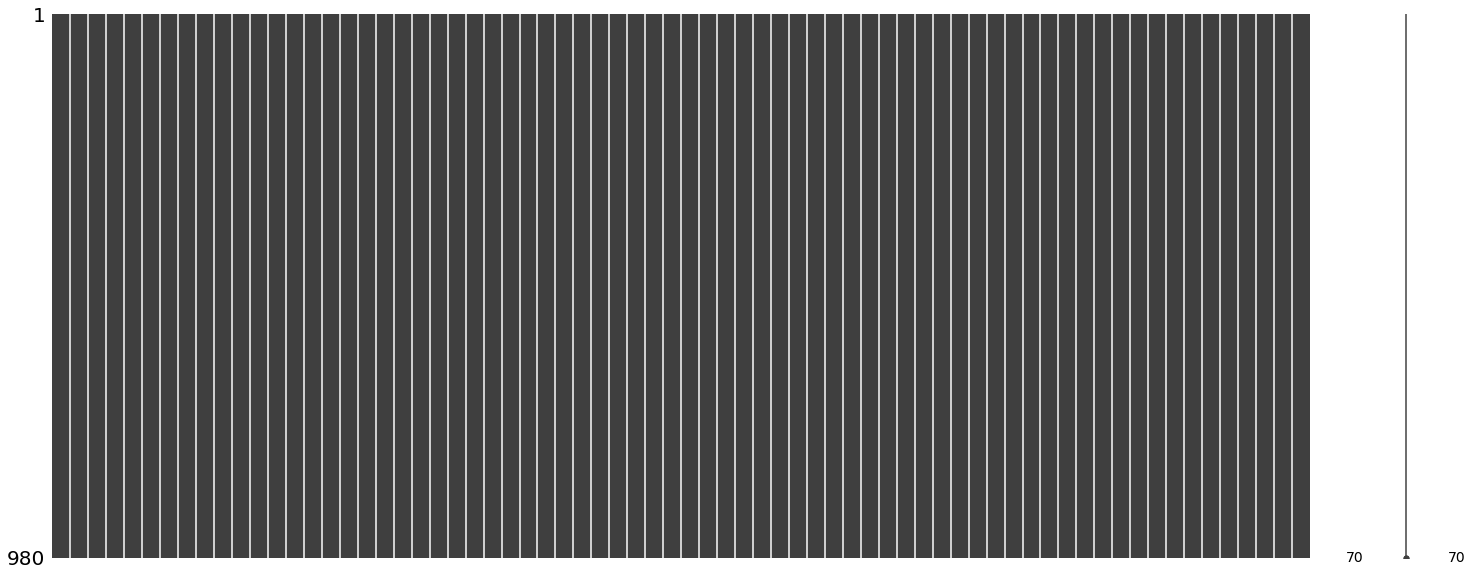

In [1262]:
# Instalando biblioteca missingno para visualização de valores nulos e importando
import missingno as msno

#Visualizando espaçamento dos valores nulos nas colunas pela função matrix()
msno.matrix(df_dropped_NA)

In [1263]:
df_dropped_NA["P1"] = df_dropped_NA["P1"].replace([7.0,6.0],[3,2])
df_dropped_NA["P1"].value_counts(dropna=False)

1.0    442
2.0    306
4.0    186
3.0     30
5.0     16
Name: P1, dtype: int64

In [1264]:
df_dropped_NA["P6"] = df_dropped_NA["P6"].replace([" "],[0])
df_dropped_NA["P6"][df_dropped_NA["P6"] == 0] = np.nan
df_dropped_NA["P6"].value_counts(dropna=False)

6.0    186
2.0    176
7.0    173
5.0    143
3.0    103
1.0    101
4.0     97
NaN      1
Name: P6, dtype: int64

In [1265]:
df_dropped_NA['P18']=df_dropped_NA['P18'].astype(str)
df_dropped_NA["P18"].value_counts(dropna=False)

1                      326
2                      324
7                       75
6                       68
5                       64
3                       63
4                       57
1900-01-05 00:00:00      2
1900-01-01 00:00:00      1
Name: P18, dtype: int64

In [1266]:
df_dropped_NA["P18"] = df_dropped_NA["P18"].replace(["1900-01-05 00:00:00"],["5"])
df_dropped_NA["P18"] = df_dropped_NA["P18"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P18"].value_counts(dropna=False)


1    327
2    324
7     75
6     68
5     66
3     63
4     57
Name: P18, dtype: int64

In [1267]:
df_dropped_NA['P19']=df_dropped_NA['P19'].astype(str)
df_dropped_NA["P19"] = df_dropped_NA["P19"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P19"] = df_dropped_NA["P19"].replace(["1900-01-06 00:00:00"],["6"])
df_dropped_NA["P19"].value_counts(dropna=False)

7    373
5    195
6    177
3    110
2    101
4     12
1     12
Name: P19, dtype: int64

In [1268]:
df_dropped_NA['P20']=df_dropped_NA['P20'].astype(str)
df_dropped_NA["P20"] = df_dropped_NA["P20"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P20"] = df_dropped_NA["P20"].replace(["1900-01-04 00:00:00"],["4"])
df_dropped_NA["P20"].value_counts(dropna=False)

5    160
3    156
6    150
4    150
2    131
7    127
1    106
Name: P20, dtype: int64

In [1269]:
df_dropped_NA['P21']=df_dropped_NA['P21'].astype(str)
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-02 00:00:00"],["2"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-04 00:00:00"],["4"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-06 00:00:00"],["6"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-07 00:00:00"],["7"])
df_dropped_NA["P21"].value_counts(dropna=False)

4    176
1    176
3    172
2    168
5    108
7     90
6     90
Name: P21, dtype: int64

In [1270]:
df_dropped_NA['P22']=df_dropped_NA['P22'].astype(str)
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-07 00:00:00"],["7"])
df_dropped_NA["P22"].value_counts(dropna=False)

3    188
1    170
2    162
4    152
6    106
5    103
7     99
Name: P22, dtype: int64

In [1271]:
df_dropped_NA['P23']=df_dropped_NA['P23'].astype(str)
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-05 00:00:00"],["5"])
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-02 00:00:00"],["2"])
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P23"].value_counts(dropna=False)

5    411
6    175
7    164
1    104
2    100
3     14
4     12
Name: P23, dtype: int64

In [1272]:
df_dropped_NA["P43"] = df_dropped_NA["P43"].replace([1234567890987650000],[0])
df_dropped_NA["P43"][df_dropped_NA["P43"] == 0] = np.nan
df_dropped_NA["P43"].value_counts(dropna=False)

5.0    156
3.0    154
1.0    153
2.0    139
7.0    127
6.0    127
4.0    123
NaN      1
Name: P43, dtype: int64

In [1273]:
df_dropped_NA["P55"] = df_dropped_NA["P55"].replace([1.23456789098765e+36],[0])
df_dropped_NA["P55"][df_dropped_NA["P55"] == 0] = np.nan
df_dropped_NA["P55"].value_counts(dropna=False)


2.0    158
7.0    150
4.0    146
6.0    140
5.0    132
1.0    131
3.0    122
NaN      1
Name: P55, dtype: int64

In [1274]:
df_dropped_NA["Qesc"] = df_dropped_NA["Qesc"].replace([7],[6])

df_dropped_NA["Qesc"].value_counts(dropna=False)

6.0    263
5.0    261
4.0    126
3.0    113
1.0    110
2.0    107
Name: Qesc, dtype: int64

In [1275]:

df_dropped_NA["Qnat"][df_dropped_NA["Qnat"] > 12] = np.nan
df_dropped_NA["Qnat"] = df_dropped_NA["Qnat"].replace([0,1,2,3,4],[1,2,2,3,3])
df_dropped_NA["Qnat"][df_dropped_NA["Qnat"] >= 5] = 4
df_dropped_NA["Qnat"].value_counts(dropna=False)
# 1-(0 filhos), 2-(1-2 filhos), 3 -(3-4 filhos), 4-(5+ filhos)

2.0    416
3.0    242
1.0    168
4.0    140
NaN     14
Name: Qnat, dtype: int64

In [1276]:
df_dropped_NA["Qcama"][df_dropped_NA["Qcama"] > 12] = np.nan
df_dropped_NA["Qcama"].value_counts(dropna=False)

1.0     404
3.0     152
4.0     139
2.0     132
0.0      48
5.0      48
9.0      14
8.0      14
6.0      13
7.0       9
10.0      6
NaN       1
Name: Qcama, dtype: int64

In [1277]:

df_dropped_NA["Qche"] = df_dropped_NA["Qche"].replace(["quinta-Feira","Quinta Feira","quintaFeira"],["Quinta-Feira","Quinta-Feira","Quinta-Feira"])
df_dropped_NA["Qche"].value_counts(dropna=False)


Quinta-Feira     329
Terça-Feira      205
Sexta-Feira      186
Quarta-Feira     132
Sábado            51
Segunda-Feira     46
Domingo           31
Name: Qche, dtype: int64

In [1278]:
df_dropped_NA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1267
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        980 non-null    float64
 1   P2        980 non-null    object 
 2   P3        980 non-null    float64
 3   P4        980 non-null    float64
 4   P5        980 non-null    object 
 5   P6        979 non-null    float64
 6   P7        980 non-null    object 
 7   P8        980 non-null    float64
 8   P9        980 non-null    object 
 9   P10       980 non-null    float64
 10  P11       980 non-null    float64
 11  P12       980 non-null    object 
 12  P13       980 non-null    float64
 13  P14       980 non-null    float64
 14  P15       980 non-null    float64
 15  P16       980 non-null    float64
 16  P17       980 non-null    float64
 17  P18       980 non-null    object 
 18  P19       980 non-null    object 
 19  P20       980 non-null    object 
 20  P21       980 non-null    objec

In [1279]:
df_limpo = df_dropped_NA.dropna(how = "any")
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1266
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        962 non-null    float64
 1   P2        962 non-null    object 
 2   P3        962 non-null    float64
 3   P4        962 non-null    float64
 4   P5        962 non-null    object 
 5   P6        962 non-null    float64
 6   P7        962 non-null    object 
 7   P8        962 non-null    float64
 8   P9        962 non-null    object 
 9   P10       962 non-null    float64
 10  P11       962 non-null    float64
 11  P12       962 non-null    object 
 12  P13       962 non-null    float64
 13  P14       962 non-null    float64
 14  P15       962 non-null    float64
 15  P16       962 non-null    float64
 16  P17       962 non-null    float64
 17  P18       962 non-null    object 
 18  P19       962 non-null    object 
 19  P20       962 non-null    object 
 20  P21       962 non-null    objec

In [1280]:
df_limpo["P2"] = df_limpo["P2"].astype(float)
df_limpo["P5"] = df_limpo["P5"].astype(float)
df_limpo["P7"] = df_limpo["P7"].astype(float)
df_limpo["P9"] = df_limpo["P9"].astype(float)
df_limpo["P12"] = df_limpo["P12"].astype(float)
df_limpo["P18"] = df_limpo["P18"].astype(float)
df_limpo["P19"] = df_limpo["P19"].astype(float)
df_limpo["P20"] = df_limpo["P20"].astype(float)
df_limpo["P21"] = df_limpo["P21"].astype(float)
df_limpo["P22"] = df_limpo["P22"].astype(float)
df_limpo["P23"] = df_limpo["P23"].astype(float)
df_limpo["Qesc"] = df_limpo["Qesc"].astype(object)
df_limpo["Qocup"] = df_limpo["Qocup"].astype(object)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1266
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        962 non-null    float64
 1   P2        962 non-null    float64
 2   P3        962 non-null    float64
 3   P4        962 non-null    float64
 4   P5        962 non-null    float64
 5   P6        962 non-null    float64
 6   P7        962 non-null    float64
 7   P8        962 non-null    float64
 8   P9        962 non-null    float64
 9   P10       962 non-null    float64
 10  P11       962 non-null    float64
 11  P12       962 non-null    float64
 12  P13       962 non-null    float64
 13  P14       962 non-null    float64
 14  P15       962 non-null    float64
 15  P16       962 non-null    float64
 16  P17       962 non-null    float64
 17  P18       962 non-null    float64
 18  P19       962 non-null    float64
 19  P20       962 non-null    float64
 20  P21       962 non-null    float

In [1281]:
df_limpo.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P55,P56,P57,P58,Qnat,Qcama,Qest,Qid,Qgen,Qreg
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,...,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000
mean,1.996881,3.950104,4.545738,4.539501,4.409563,4.290021,3.628898,4.194387,4.806653,2.857588,...,4.040541,3.968815,4.728690,3.914761,2.366944,2.367983,3.650728,3.531185,1.505198,2.583160
std,1.169768,1.886919,1.987078,1.978816,1.921626,2.040201,2.271049,1.957044,1.888692,2.093916,...,2.011781,2.026634,1.787978,1.992966,0.932402,1.866996,1.625321,1.593942,0.500233,1.386664
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,5.000000,1.000000,...,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000
50%,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,4.000000,5.000000,2.000000,...,4.000000,4.000000,5.000000,4.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000
75%,2.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,...,6.000000,6.000000,6.000000,6.000000,3.000000,3.000000,4.000000,5.000000,2.000000,4.000000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,4.000000,10.000000,6.000000,6.000000,2.000000,5.000000


In [1282]:
BINS = int(np.sqrt(len(df_limpo.index)))
#Plotando histogramas das variáveis quantitativas individualmente para ver seu espaçamento e frequência
df_limpo.hist(bins=BINS, figsize=(15,10));

Error in callback <function flush_figures at 0x7fe030a7d4c0> (for post_execute):


KeyboardInterrupt: 

-----

# Definindo a persona

In [1283]:
df_limpo["P2"] = df_limpo["P2"].replace([1,2,3,4,5,6,7,8],["Visitar_amigos","Visitar_familia","Lazer","Pesquisa_Científica","Trabalho", "Viagem_gastronômica","Desconectar","Não_viajei"])
df_limpo["Qesc"] = df_limpo["Qesc"].replace([1,2,3,4,5,6],["EF_incompleto","EF_completo","EM_incompleto","EM_completo","ES_incompleto", "ES_completo"])
df_limpo["Qciv"] = df_limpo["Qciv"].replace([1,2,3,4,5],["Solteiro","Casado","Separado","Divorciado","Viúvo"])
df_limpo["Qocup"] = df_limpo["Qocup"].replace([1,2,3,4,5,6],["Meio_tempo","Tempo_integral","Desempregado","Autonomo","Estudante", "Aposentado"])
df_limpo["Qid"] = df_limpo["Qid"].replace([1,2,3,4,5,6],["-18","18-24","25-34","35-44","45-54", "55+"])
df_limpo["Qgen"] = df_limpo["Qgen"].replace([1,2],["Masculino","Feminino"])
df_limpo["Qreg"] = df_limpo["Qreg"].replace([1,2,3,4,5],["Sudeste","Sul","Centro_Oeste","Nordeste","Norte"])
                              
                                                                           

In [1284]:
df_limpo["P2"] = df_limpo["P2"].astype(object)
df_limpo["P5"] = df_limpo["P5"].astype(float)
df_limpo["P7"] = df_limpo["P7"].astype(float)
df_limpo["P9"] = df_limpo["P9"].astype(float)
df_limpo["P12"] = df_limpo["P12"].astype(float)
df_limpo["P18"] = df_limpo["P18"].astype(float)
df_limpo["P19"] = df_limpo["P19"].astype(float)
df_limpo["P20"] = df_limpo["P20"].astype(float)
df_limpo["P21"] = df_limpo["P21"].astype(float)
df_limpo["P22"] = df_limpo["P22"].astype(float)
df_limpo["P23"] = df_limpo["P23"].astype(float)
df_limpo["Qesc"] = df_limpo["Qesc"].astype(object)
df_limpo["Qocup"] = df_limpo["Qocup"].astype(object)
df_limpo["Qciv"] = df_limpo["Qciv"].astype(object)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 1266
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        962 non-null    float64
 1   P2        962 non-null    object 
 2   P3        962 non-null    float64
 3   P4        962 non-null    float64
 4   P5        962 non-null    float64
 5   P6        962 non-null    float64
 6   P7        962 non-null    float64
 7   P8        962 non-null    float64
 8   P9        962 non-null    float64
 9   P10       962 non-null    float64
 10  P11       962 non-null    float64
 11  P12       962 non-null    float64
 12  P13       962 non-null    float64
 13  P14       962 non-null    float64
 14  P15       962 non-null    float64
 15  P16       962 non-null    float64
 16  P17       962 non-null    float64
 17  P18       962 non-null    float64
 18  P19       962 non-null    float64
 19  P20       962 non-null    float64
 20  P21       962 non-null    float

In [1285]:
df_limpo["P1"] = df_limpo["P1"].replace([5.0],[0])
df_limpo["P1"].value_counts()

1.0    437
2.0    300
4.0    183
3.0     29
0.0     13
Name: P1, dtype: int64

In [1286]:
df_limpo["Qdias"] = df_limpo["P1"]* df_limpo["Qest"]
df_limpo["Qdias"].value_counts() 

4.0     244
6.0     208
3.0     175
8.0     169
12.0    130
2.0      14
0.0      13
9.0       5
16.0      3
1.0       1
Name: Qdias, dtype: int64

In [1287]:
df_limpo["Qciv"].value_counts()

Casado        462
Divorciado    187
Viúvo         134
Solteiro      134
Separado       45
Name: Qciv, dtype: int64

In [1288]:
df_limpo["P57"].value_counts()

6.0    237
4.0    213
7.0    180
3.0    109
5.0    102
1.0     64
2.0     57
Name: P57, dtype: int64

In [1289]:
df_limpo["P58"].value_counts()

1.0    148
3.0    145
4.0    142
6.0    140
2.0    136
5.0    127
7.0    124
Name: P58, dtype: int64

# Variavel qualitativa para quantitativa

In [1290]:
# Importando do sklearn para aplicação do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
#from seaborn import load_dataset




transformer = make_column_transformer(
    (OneHotEncoder(), ['P2',"Qesc","Qciv","Qtipcama","Qche","Qocup","Qid","Qgen","Qreg","Qclasse"]),
    remainder='passthrough')
#"Qclasse

transformed = transformer.fit_transform(df_limpo)
df_to_model = pd.DataFrame(transformed, columns=transformer.get_feature_names())
df_to_model

,onehotencoder__x0_Desconectar,onehotencoder__x0_Lazer,onehotencoder__x0_Pesquisa_Científica,onehotencoder__x0_Trabalho,onehotencoder__x0_Viagem_gastronômica,onehotencoder__x0_Visitar_amigos,onehotencoder__x0_Visitar_familia,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,...,P53,P54,P55,P56,P57,P58,Qnat,Qcama,Qest,Qdias
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,1.0,2.0,5.0,5.0,1.0,1.0,4.0,8.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,6.0,7.0,5.0,7.0,1.0,1.0,3.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,5.0,4.0,2.0,6.0,4.0,3.0,1.0,6.0,6.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,2.0,3.0,2.0,5.0,2.0,1.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,4.0,1.0,2.0,1.0,4.0,8.0
958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,7.0,5.0,1.0,4.0,7.0,3.0,6.0,2.0,6.0
959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,6.0,1.0,7.0,4.0,2.0,2.0,6.0,12.0
960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,7.0,5.0,2.0,7.0,1.0,2.0,3.0,6.0


In [1291]:
y = df_to_model.loc[:,"P1"]
X = df_to_model.drop(["Qdias","P1","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58"], axis=1)

In [1292]:
target = df_to_model[['P1']]
df_teste = df_to_model.drop(["Qdias","P1","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58"], axis=1)

-------
# Aplicando modelo
## Utilizando a 

In [1293]:
from sklearn.model_selection import train_test_split
x_treino, x_val, y_treino, y_val = train_test_split(df_teste,
                                                   target,
                                                   test_size=0.3,
                                                   random_state=42)

In [1294]:
x_val.columns

Index(['onehotencoder__x0_Desconectar', 'onehotencoder__x0_Lazer',
       'onehotencoder__x0_Pesquisa_Científica', 'onehotencoder__x0_Trabalho',
       'onehotencoder__x0_Viagem_gastronômica',
       'onehotencoder__x0_Visitar_amigos', 'onehotencoder__x0_Visitar_familia',
       'onehotencoder__x1_EF_completo', 'onehotencoder__x1_EF_incompleto',
       'onehotencoder__x1_EM_completo', 'onehotencoder__x1_EM_incompleto',
       'onehotencoder__x1_ES_completo', 'onehotencoder__x1_ES_incompleto',
       'onehotencoder__x2_Casado', 'onehotencoder__x2_Divorciado',
       'onehotencoder__x2_Separado', 'onehotencoder__x2_Solteiro',
       'onehotencoder__x2_Viúvo', 'onehotencoder__x3_Casado',
       'onehotencoder__x3_Solteiro ', 'onehotencoder__x3_Viuvo',
       'onehotencoder__x4_Domingo', 'onehotencoder__x4_Quarta-Feira',
       'onehotencoder__x4_Quinta-Feira', 'onehotencoder__x4_Segunda-Feira',
       'onehotencoder__x4_Sexta-Feira', 'onehotencoder__x4_Sábado',
       'onehotencoder__x4_T

In [1295]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [1296]:
tr = DecisionTreeRegressor(random_state=42)

In [1297]:
rf = RandomForestRegressor(random_state=42)

In [1298]:
gb = GradientBoostingRegressor(random_state=42)

In [1299]:
tr.fit(x_treino, y_treino)

DecisionTreeRegressor(random_state=42)

In [1300]:
rf.fit(x_treino, y_treino)

RandomForestRegressor(random_state=42)

In [1301]:
gb.fit(x_treino, y_treino)

GradientBoostingRegressor(random_state=42)

In [1302]:
from sklearn.metrics import r2_score

	
from sklearn.metrics import mean_squared_error

------

# Desempenho

## Decision tree

In [1303]:
r2_score(y_treino, tr.predict(x_treino))

1.0

In [1304]:
r2_score(y_val, tr.predict(x_val))

0.44446938058623797

## Random Forest

In [1305]:
r2_score(y_treino, rf.predict(x_treino))

0.9659368968129232

In [1306]:
r2_score(y_val, rf.predict(x_val))

0.688902571133055

## Gradient Boosting

In [1307]:
r2_score(y_treino, gb.predict(x_treino))

0.9054212800082568

In [1308]:
r2_score(y_val, gb.predict(x_val))

0.6738315054935693

In [1309]:
from sklearn.model_selection import cross_val_score

In [1310]:
#CrossVal Decision Tree
rf_scores = cross_val_score(
    rf,  # modelo
    x_treino,  # X_train
    y_treino,  # y_train
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

# Acurácia
tr_scores.mean()

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

0.43425475728002666

------
## Desempenho do melhor modelo - Features mais importantes

In [1311]:
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.feature_selection import SelectKBest

In [1312]:
y_treino.columns

Index(['P1'], dtype='object')

In [1313]:
f_reg = SelectKBest(f_regression, k=5)

In [1314]:
f_reg.fit(x_treino, y_treino)

SelectKBest(k=5, score_func=<function f_regression at 0x7fdff01f4d30>)

In [1315]:
f_reg_support = f_reg.get_support()
f_feature = x_treino.loc[:, f_reg_support].columns.tolist()
f_feature

['onehotencoder__x0_Lazer',
 'onehotencoder__x0_Trabalho',
 'onehotencoder__x3_Solteiro ',
 'onehotencoder__x4_Quarta-Feira',
 'Qest']

In [1316]:
mi_reg = SelectKBest(mutual_info_regression, k=5)

In [1317]:
mi_reg.fit(x_treino, y_treino)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7fe0002f64c0>)

In [1318]:
mi_reg_support = mi_reg.get_support()
mi_feature = x_treino.loc[:, mi_reg_support].columns.tolist()
mi_feature

['onehotencoder__x0_Trabalho',
 'onehotencoder__x3_Solteiro ',
 'onehotencoder__x4_Quarta-Feira',
 'onehotencoder__x9_A',
 'Qest']

-------

# Aplicando modelo em segmentação
##  Utilizar o modelo em uma base reduzida a partir das caracteristicas mais comuns do turista

In [1319]:
df_lazer = df_limpo
df_lazer["P2"][df_lazer["P2"] != "Lazer"] = np.nan
df_lazer["P2"].value_counts(dropna=False)

NaN      561
Lazer    401
Name: P2, dtype: int64

In [1320]:
df_lazer = df_lazer.dropna(how = "any")
df_lazer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 3 to 1266
Data columns (total 71 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P1        401 non-null    float64
 1   P2        401 non-null    object 
 2   P3        401 non-null    float64
 3   P4        401 non-null    float64
 4   P5        401 non-null    float64
 5   P6        401 non-null    float64
 6   P7        401 non-null    float64
 7   P8        401 non-null    float64
 8   P9        401 non-null    float64
 9   P10       401 non-null    float64
 10  P11       401 non-null    float64
 11  P12       401 non-null    float64
 12  P13       401 non-null    float64
 13  P14       401 non-null    float64
 14  P15       401 non-null    float64
 15  P16       401 non-null    float64
 16  P17       401 non-null    float64
 17  P18       401 non-null    float64
 18  P19       401 non-null    float64
 19  P20       401 non-null    float64
 20  P21       401 non-null    float

In [1321]:
df_lazer["P1"].value_counts()

1.0    243
2.0    149
3.0      4
0.0      4
4.0      1
Name: P1, dtype: int64

In [1322]:
df_limpo["P1"].value_counts()

1.0    437
2.0    300
4.0    183
3.0     29
0.0     13
Name: P1, dtype: int64

------

# Clusterização


In [1323]:
# Importando do sklearn para aplicação do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
#from seaborn import load_dataset




transformer = make_column_transformer(
    (OneHotEncoder(), ['P2',"Qesc","Qciv","Qtipcama","Qche","Qocup","Qid","Qgen","Qreg","Qclasse"]),
    remainder='passthrough')
#"Qclasse

transformed = transformer.fit_transform(df_limpo)
df_to_model_2 = pd.DataFrame(transformed, columns=transformer.get_feature_names())
df_to_model_2

,onehotencoder__x0_Lazer,onehotencoder__x0_nan,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,onehotencoder__x1_EM_incompleto,onehotencoder__x1_ES_completo,onehotencoder__x1_ES_incompleto,onehotencoder__x2_Casado,onehotencoder__x2_Divorciado,...,P53,P54,P55,P56,P57,P58,Qnat,Qcama,Qest,Qdias
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,5.0,4.0,1.0,2.0,5.0,5.0,1.0,1.0,4.0,8.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,7.0,6.0,7.0,5.0,7.0,1.0,1.0,3.0,3.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,6.0,5.0,4.0,2.0,6.0,4.0,3.0,1.0,6.0,6.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,5.0,2.0,3.0,2.0,5.0,2.0,1.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,4.0,2.0,1.0,4.0,4.0,1.0,2.0,1.0,4.0,8.0
958,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,5.0,7.0,5.0,1.0,4.0,7.0,3.0,6.0,2.0,6.0
959,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,6.0,1.0,7.0,4.0,2.0,2.0,6.0,12.0
960,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,7.0,5.0,2.0,7.0,1.0,2.0,3.0,6.0


In [1324]:

#y_cl = df_to_model_2.loc[:,"Qclasse"]
X_cl = df_to_model_2.drop(["Qdias","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58"], axis=1)


In [1325]:
#y_k = y_cl 
X_k = X_cl

In [1326]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

#X_k['Qclasse'] = le.fit_transform(X_k['Qclasse'])

#y_k = le.transform(y_k)

In [1327]:
#cols = X_k.columns

In [1328]:
#from sklearn.preprocessing import MinMaxScaler

#ms = MinMaxScaler()

#X_k = ms.fit_transform(X_k)

In [1329]:
#X_k = pd.DataFrame(X_k, columns=[cols])

------

## Kmeans

In [1330]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X_k)

KMeans(n_clusters=4, random_state=0)

In [1331]:
kmeans.fit_predict(X_k)

array([3, 2, 1, 0, 3, 0, 2, 0, 0, 2, 2, 2, 1, 3, 0, 2, 3, 0, 2, 0, 3, 0,
       3, 1, 2, 1, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 0, 0, 0, 2, 3, 1, 3, 0,
       2, 3, 3, 3, 0, 1, 3, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0,
       1, 2, 3, 0, 1, 2, 2, 1, 3, 2, 0, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 3, 2, 1, 3, 3, 0, 0, 2, 3, 1, 2, 2, 3, 3, 3, 2, 1, 3, 1, 3, 0,
       1, 0, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 0, 3,
       1, 3, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 3, 2, 2, 1, 0, 2, 3,
       3, 3, 2, 0, 3, 0, 2, 1, 0, 3, 2, 3, 0, 1, 3, 3, 2, 0, 3, 2, 3, 0,
       0, 3, 0, 1, 3, 2, 3, 1, 2, 3, 0, 2, 1, 2, 1, 1, 3, 1, 2, 3, 3, 2,
       3, 1, 2, 0, 3, 2, 3, 1, 2, 3, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 3, 2,
       2, 3, 0, 0, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 0, 1, 3,
       2, 3, 0, 3, 2, 2, 2, 1, 1, 2, 3, 0, 1, 2, 1, 1, 3, 3, 2, 0, 1, 2,
       1, 3, 3, 3, 0, 3, 0, 0, 1, 2, 0, 2, 1, 1, 3, 2, 3, 3, 1, 3, 1, 2,
       3, 3, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1, 2, 0, 0,

In [1332]:
centroids = kmeans.cluster_centers_


In [1333]:
kmeans.inertia_

17960.514655774157

In [1334]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 150 out of 962 samples were correctly labeled.


In [1335]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.16


## DBSCAN

In [1336]:
from sklearn.cluster import DBSCAN

# Criar o objeto DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar o modelo aos dados
dbscan.fit(X_cl)

# Obter as etiquetas dos clusters (-1 para pontos de ruído)
labels = dbscan.labels_

# Obter os centróides dos clusters
centroids = X_cl.groupby(labels).mean()

### Melhor número de clusters

In [1337]:
X_k

,onehotencoder__x0_Lazer,onehotencoder__x0_nan,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,onehotencoder__x1_EM_incompleto,onehotencoder__x1_ES_completo,onehotencoder__x1_ES_incompleto,onehotencoder__x2_Casado,onehotencoder__x2_Divorciado,...,onehotencoder__x9_A,onehotencoder__x9_B,onehotencoder__x9_C,P1,P3,P25,P31,Qnat,Qcama,Qest
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,7.0,5.0,5.0,1.0,1.0,4.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,2.0,4.0,5.0,2.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,7.0,5.0,1.0,1.0,1.0,3.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,4.0,4.0,2.0,3.0,1.0,6.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,6.0,4.0,4.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,2.0,7.0,2.0,4.0,2.0,1.0,4.0
958,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3.0,3.0,7.0,6.0,3.0,6.0,2.0
959,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,7.0,7.0,7.0,2.0,2.0,6.0
960,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,2.0,6.0,2.0,6.0,1.0,2.0,3.0


In [1339]:
from sklearn.cluster import KMeans

cs = []
for i in range(1, 11):
    cs.append(KMeans(n_clusters = i, max_iter = 10000, n_init = 100, random_state = 61658).fit(X_k).inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(3, cs)
plt.grid()

In [ ]:
X_k.info()